In [1]:
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import cv2
from scipy.signal import convolve2d
from skimage.util import crop
from skimage import color
import numpy.fft as fft

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Reading all the images:

In [3]:
imgs = []
for i in range(1, 10):
  imgs.append(skio.imread("dices" + str(i) + ".jpg"))

Pre-processing methods:

In [4]:
def dice_mask(img):
  imhsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  low_red = np.array([122,50,50])
  high_red = np.array([136,255,255])
  mask = cv2.inRange(imhsv, low_red, high_red)
  return mask

In [11]:
def saturation_reduction(img,alpha):
  # alpha must be larger than one
  hsv = color.rgb2hsv(img)
  hsv[..., 1] = np.power(hsv[..., 1], 1/alpha)
  return color.hsv2rgb(hsv)

In [16]:
def gamma_transformation(img,gamma):
  # gamma must be in the [0,1] range
  hsv = color.rgb2hsv(img)
  hsv[..., 2] = np.power(hsv[..., 2], gamma)
  return(color.hsv2rgb(hsv))

One example of an image:

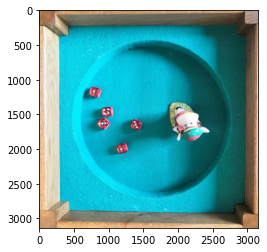

In [6]:
img = skio.imread("dices2.jpg")
imhsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rows,cols,channels=imhsv.shape
plt.imshow(img)

In [ ]:
imred   = img[:,:,0]
imgreen = img[:,:,1]
imblue  = img[:,:,2]


low_red2=np.array([122,100,100])
high_red2=np.array([135,255,255])
mask=cv2.inRange(imhsv,low_red2,high_red2)


plt.imshow(mask, cmap='gray')
plt.show()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#we display the images
axes[0, 0].imshow(mask,cmap='gray')
axes[0,0].set_title('Masked image')
axes[0, 1].imshow(imred, cmap="gray")
axes[0,1].set_title('red channel')
axes[1, 0].imshow(imgreen, cmap="gray")
axes[1,0].set_title('green channel')
axes[1, 1].imshow(imblue, cmap="gray")
axes[1,1].set_title('blue channel')
fig.tight_layout()

NameError: ignored

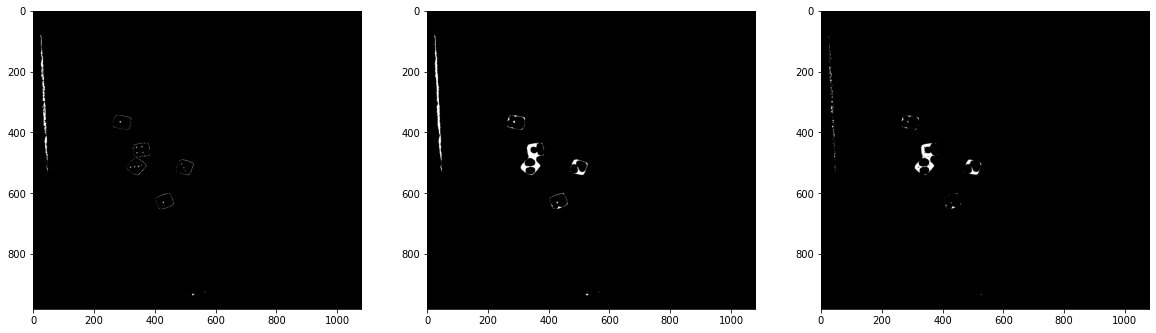

In [ ]:
strell = morpho.disk(10)
img_filtered = morpho.closing(mask, strell)

fig, axs = plt.subplots(1, 3, figsize=(20,20))
axs[0].imshow(mask, cmap='gray')
axs[1].imshow(img_filtered, cmap='gray')
axs[2].imshow(mask - img_filtered, cmap='gray')
plt.show()

image 0
area: 1914 dims: 46 56 ratio: 0.8885793871866295
area: 1703 dims: 45 55 ratio: 0.8105663969538315
area: 1768 dims: 55 62 ratio: 0.8166281755196305
area: 1771 dims: 49 56 ratio: 0.8762988619495299
area: 1840 dims: 50 57 ratio: 0.8833413346135381


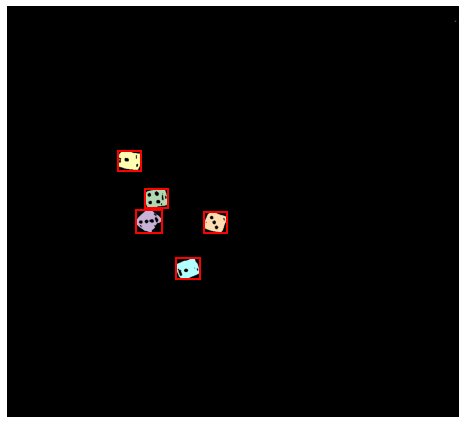

image 1
area: 17359 dims: 147 166 ratio: 0.879025724123962
area: 15588 dims: 142 161 ratio: 0.7864386257000151
area: 15600 dims: 175 187 ratio: 0.7610869883397571
area: 15439 dims: 157 168 ratio: 0.8163599830795262
area: 17340 dims: 160 167 ratio: 0.886276514183491


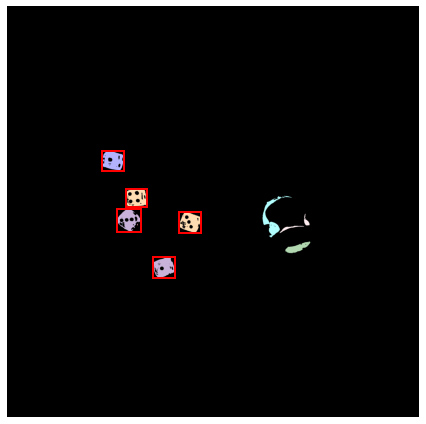

image 2
area: 1667 dims: 51 57 ratio: 0.7492134831460674
area: 1747 dims: 53 60 ratio: 0.7685877694676638
area: 1806 dims: 53 65 ratio: 0.7610619469026548
area: 2060 dims: 58 62 ratio: 0.8754781130471738
area: 1717 dims: 57 62 ratio: 0.7481481481481481


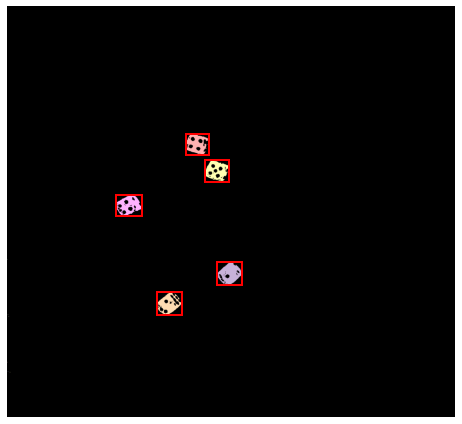

image 3
area: 17176 dims: 170 177 ratio: 0.7334528994790332
area: 16881 dims: 171 189 ratio: 0.7193812324213756
area: 18341 dims: 176 204 ratio: 0.756236341895848
area: 21305 dims: 194 196 ratio: 0.8929918685556207
area: 18072 dims: 188 195 ratio: 0.7729352893374962


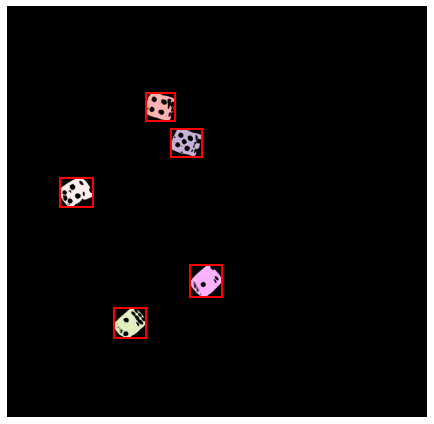

image 4
area: 20639 dims: 190 203 ratio: 0.7839182619264661
area: 16219 dims: 186 189 ratio: 0.6639240247247125
area: 20881 dims: 157 162 ratio: 0.871021565928336
area: 16342 dims: 154 182 ratio: 0.6349366695158909
area: 17271 dims: 191 198 ratio: 0.6569168156403332


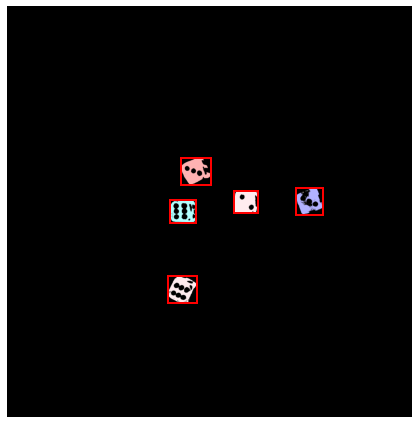

image 5
area: 12324 dims: 170 185 ratio: 0.5923576063446286
area: 21859 dims: 187 193 ratio: 0.9266214497668503
area: 17831 dims: 194 197 ratio: 0.7540810285037638
area: 18797 dims: 165 164 ratio: 0.8350510884051533
area: 15372 dims: 171 172 ratio: 0.7057527202607777


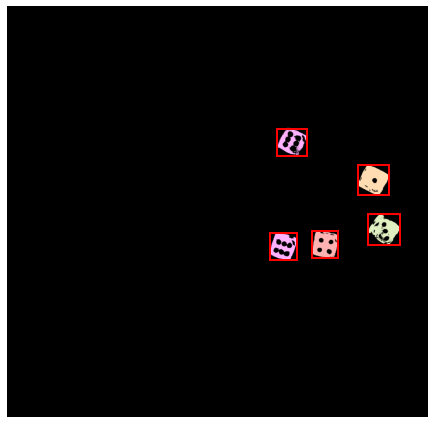

image 6
area: 17041 dims: 213 182 ratio: 0.7123866059111241
area: 21000 dims: 191 189 ratio: 0.7562934418554399
area: 21338 dims: 214 209 ratio: 0.7562107949108693
area: 16343 dims: 213 200 ratio: 0.5264802525610464
area: 19143 dims: 198 168 ratio: 0.6820951362907536


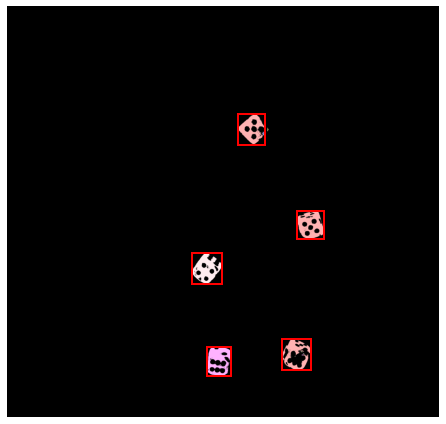

image 7
area: 18100 dims: 180 189 ratio: 0.795849272303566
area: 18746 dims: 179 174 ratio: 0.8452139411154695
area: 18620 dims: 150 150 ratio: 0.8743836581357126
area: 14595 dims: 150 164 ratio: 0.6576694304253785
area: 15153 dims: 183 179 ratio: 0.6609238016312644


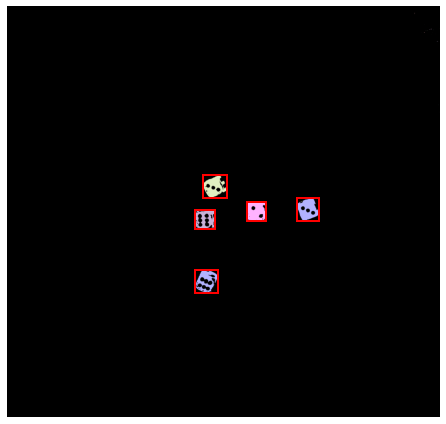

image 8
area: 18099 dims: 180 189 ratio: 0.794582491878128
area: 18898 dims: 179 175 ratio: 0.8531828442437923
area: 18618 dims: 150 151 ratio: 0.8749882507754488
area: 14671 dims: 149 164 ratio: 0.6589265663597574
area: 15169 dims: 183 179 ratio: 0.6676790351688014


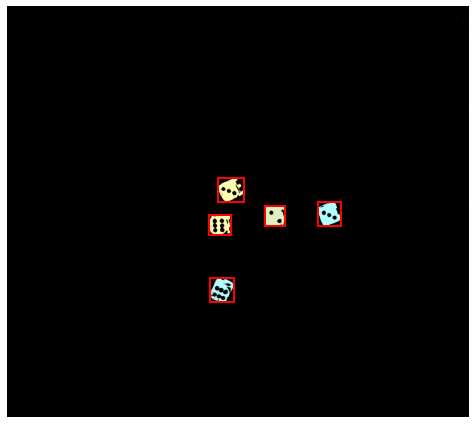

['test 0: 5', 'test 1: 5', 'test 2: 5', 'test 3: 5', 'test 4: 5', 'test 5: 5', 'test 6: 5', 'test 7: 5', 'test 8: 5']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb

counts = []
dice = []
for i, img in enumerate(imgs):
  mask = dice_mask(img)

  label_image = label(mask)
  image_label_overlay = label2rgb(label_image, image=mask, bg_label=0)

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(image_label_overlay)

  count = 0
  print('image', i)
  die_regions = []
  for region in regionprops(label_image):
      # take regions with large enough areas
      minr, minc, maxr, maxc = region.bbox
      w, h = maxr - minr, maxc - minc
      if region.area >= 1000 and region.solidity > 0.45 and w / h > 0.8 and w / h < 1.2:
          # draw rectangle around segmented dices
          die_regions.append(region.bbox)
          print('area:', region.area, 'dims:', w, h, 'ratio:', region.solidity)
          rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                    fill=False, edgecolor='red', linewidth=2)
          ax.add_patch(rect)
          count += 1
  dice.append(die_regions)
  counts.append(count)
  
  ax.set_axis_off()
  plt.tight_layout()
  plt.show()
print(['test ' + str(i) + ': ' + str(c) for i, c in enumerate(counts)])

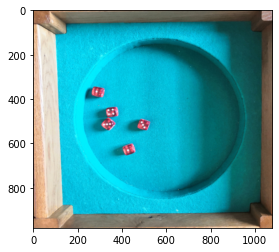

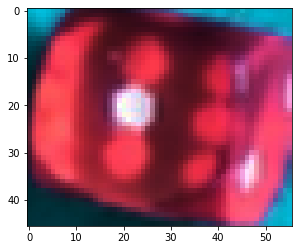

area: 49 dims: 8 7 ratio: 0.98 center: (20.693877551020407, 21.93877551020408)
points: 1


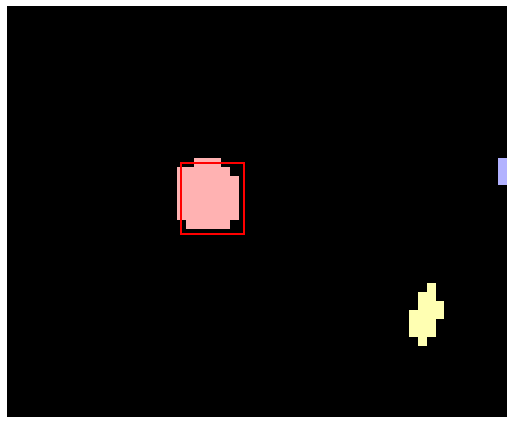

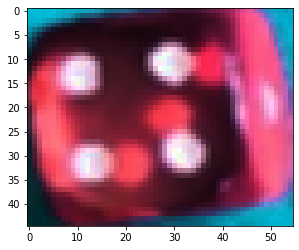

area: 40 dims: 7 8 ratio: 0.9090909090909091 center: (10.875, 29.15)
area: 41 dims: 7 7 ratio: 0.9534883720930233 center: (13.268292682926829, 10.097560975609756)
area: 42 dims: 7 7 ratio: 0.9767441860465116 center: (29.142857142857142, 31.80952380952381)
points: 3


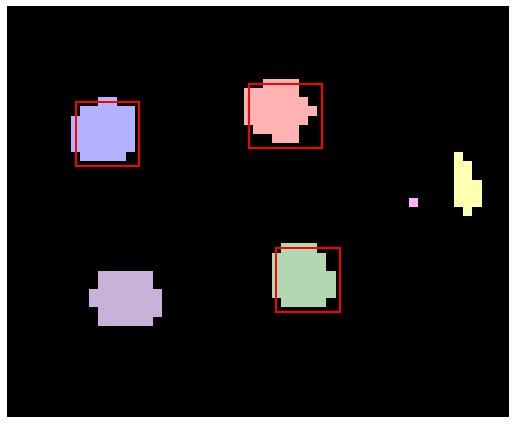

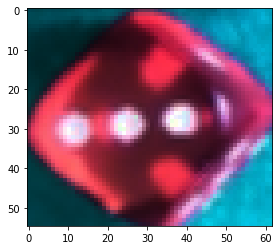

area: 38 dims: 6 7 ratio: 0.9743589743589743 center: (27.63157894736842, 38.13157894736842)
area: 41 dims: 7 8 ratio: 0.9318181818181818 center: (28.926829268292682, 24.536585365853657)
area: 42 dims: 7 7 ratio: 0.9767441860465116 center: (30.19047619047619, 11.071428571428571)
points: 3


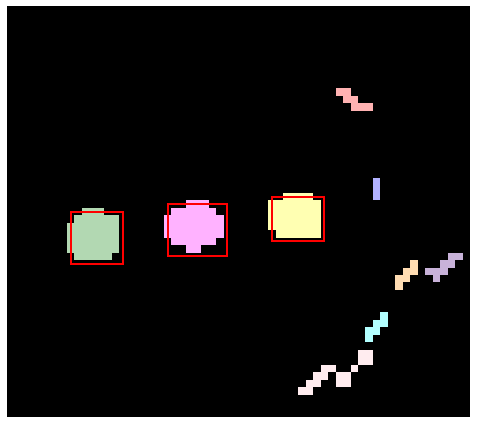

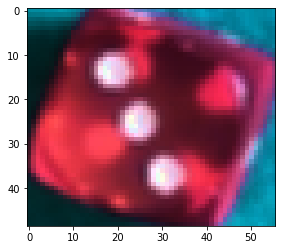

area: 35 dims: 6 7 ratio: 0.9722222222222222 center: (13.571428571428571, 18.771428571428572)
area: 35 dims: 7 6 ratio: 0.9722222222222222 center: (25.228571428571428, 24.428571428571427)
area: 38 dims: 7 7 ratio: 0.926829268292683 center: (36.921052631578945, 30.63157894736842)
points: 3


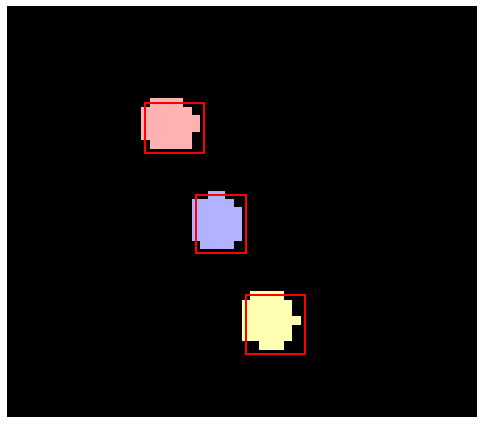

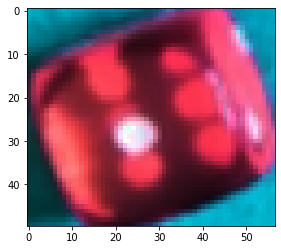

area: 49 dims: 8 8 ratio: 0.9607843137254902 center: (28.714285714285715, 24.489795918367346)
points: 1


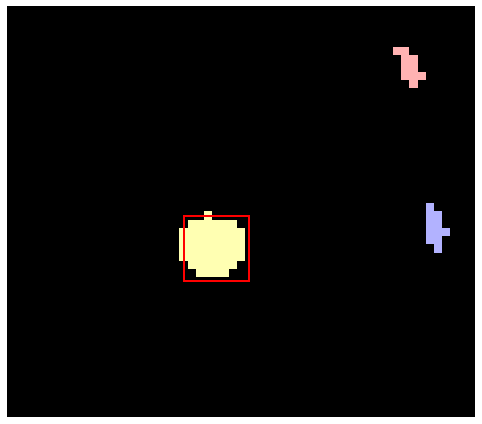

total points: 11


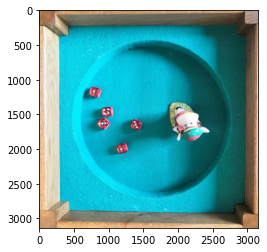

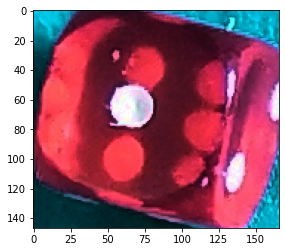

area: 659 dims: 28 29 ratio: 0.9360795454545454 center: (64.52655538694992, 66.22610015174507)
points: 1


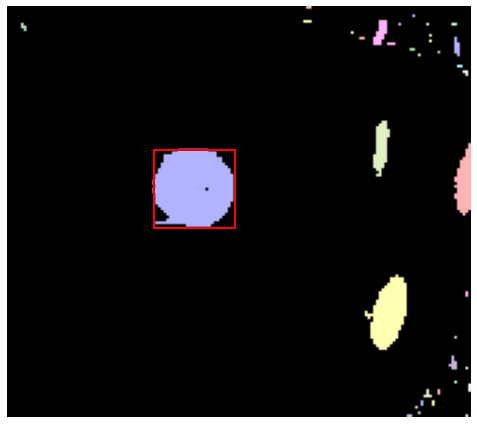

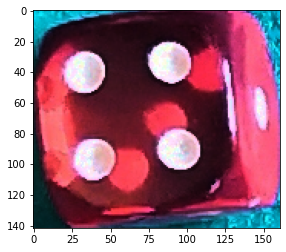

area: 572 dims: 27 28 ratio: 0.9565217391304348 center: (33.51573426573427, 88.82167832167832)
area: 568 dims: 27 27 ratio: 0.961082910321489 center: (40.12323943661972, 33.13204225352113)
area: 581 dims: 26 28 ratio: 0.9699499165275459 center: (90.43889845094664, 94.60757314974182)
area: 571 dims: 27 27 ratio: 0.9661590524534687 center: (96.80210157618214, 39.22241681260946)
points: 4


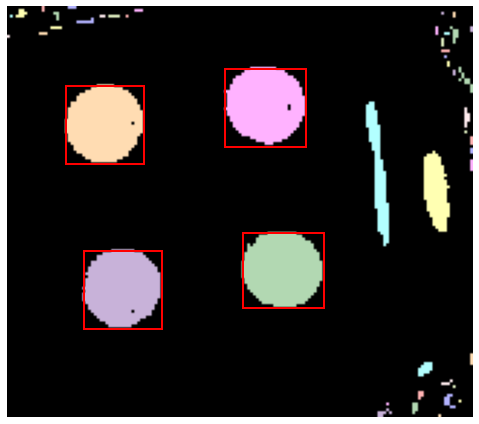

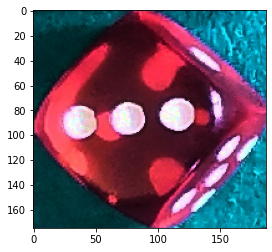

area: 560 dims: 26 27 ratio: 0.9807355516637478 center: (83.41607142857143, 115.4625)
area: 553 dims: 26 27 ratio: 0.9650959860383944 center: (86.79023508137432, 75.92043399638337)
area: 555 dims: 26 27 ratio: 0.9668989547038328 center: (89.71711711711711, 37.09189189189189)
points: 3


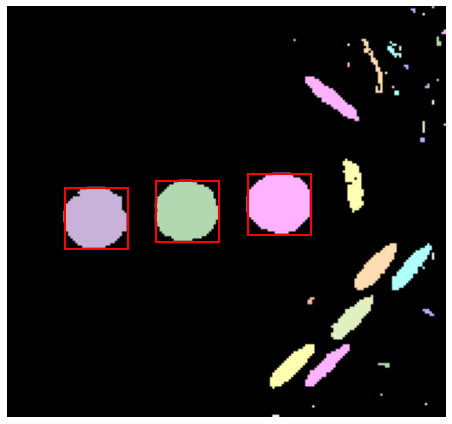

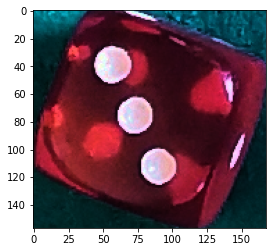

area: 548 dims: 27 27 ratio: 0.9614035087719298 center: (38.92153284671533, 56.96715328467153)
area: 526 dims: 26 25 ratio: 0.9758812615955473 center: (75.44296577946768, 73.1425855513308)
area: 502 dims: 26 25 ratio: 0.9728682170542635 center: (112.12948207171314, 89.78286852589642)
points: 3


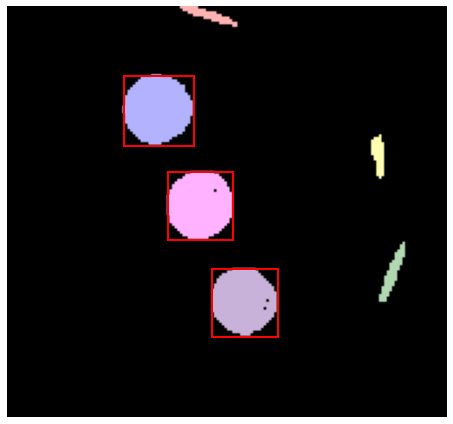

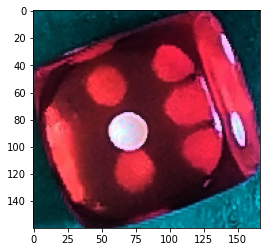

area: 623 dims: 28 28 ratio: 0.9704049844236761 center: (88.69181380417335, 69.65329052969503)
points: 1


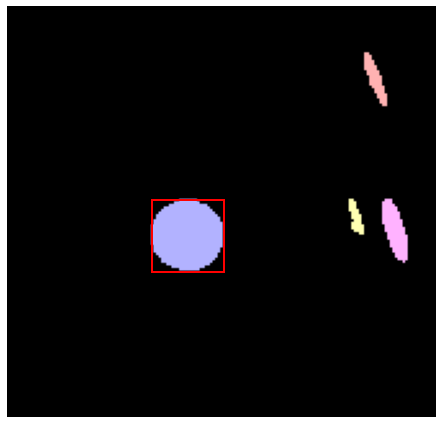

total points: 12


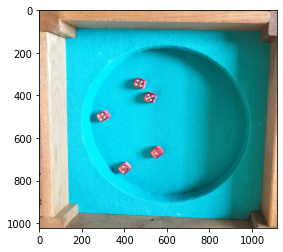

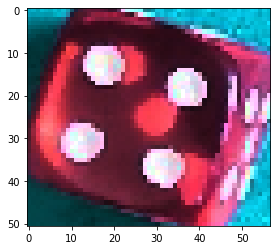

area: 69 dims: 9 10 ratio: 0.9583333333333334 center: (12.942028985507246, 17.463768115942027)
area: 66 dims: 9 9 ratio: 1.0 center: (18.136363636363637, 36.86363636363637)
area: 70 dims: 9 10 ratio: 0.9459459459459459 center: (30.885714285714286, 12.342857142857143)
area: 68 dims: 9 10 ratio: 0.9444444444444444 center: (36.75, 31.352941176470587)
points: 4


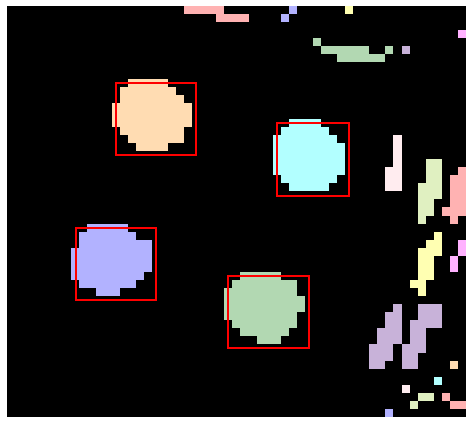

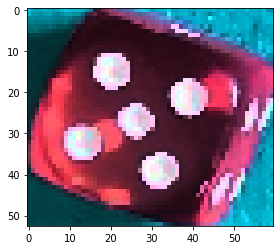

area: 64 dims: 9 9 ratio: 0.9696969696969697 center: (14.828125, 20.171875)
area: 63 dims: 9 9 ratio: 0.9545454545454546 center: (21.238095238095237, 38.80952380952381)
area: 57 dims: 9 9 ratio: 0.95 center: (26.771929824561404, 25.87719298245614)
area: 62 dims: 8 9 ratio: 0.96875 center: (32.32258064516129, 13.0)
area: 63 dims: 9 9 ratio: 0.9545454545454546 center: (39.01587301587302, 31.793650793650794)
points: 5


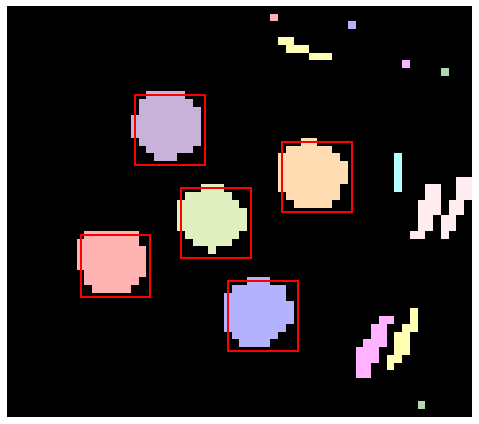

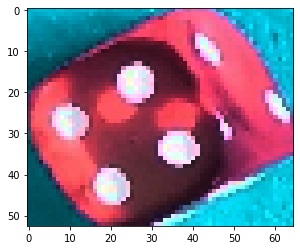

area: 67 dims: 9 9 ratio: 0.9710144927536232 center: (17.91044776119403, 26.029850746268657)
area: 58 dims: 9 9 ratio: 0.9354838709677419 center: (27.103448275862068, 9.931034482758621)
area: 61 dims: 9 9 ratio: 0.9682539682539683 center: (43.01639344262295, 20.131147540983605)
points: 3


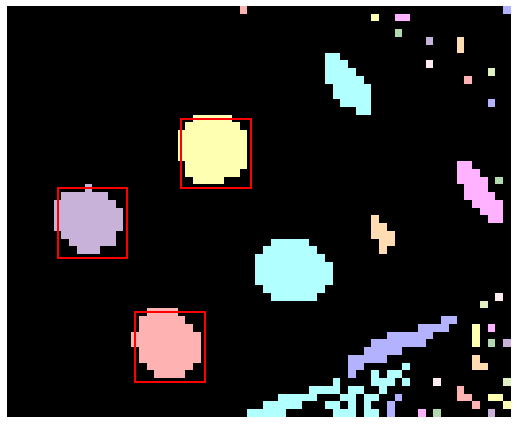

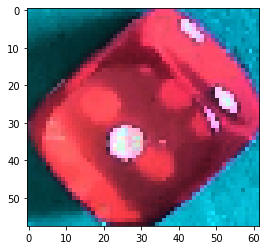

area: 67 dims: 9 9 ratio: 0.9571428571428572 center: (35.223880597014926, 25.925373134328357)
points: 1


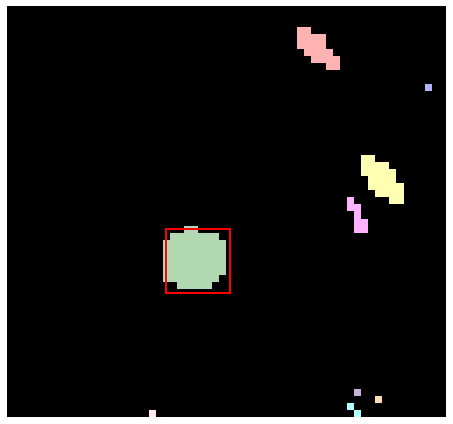

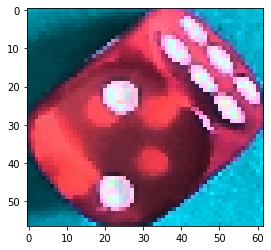

area: 38 dims: 8 8 ratio: 0.9047619047619048 center: (10.5, 38.5)
area: 65 dims: 9 9 ratio: 0.9848484848484849 center: (22.8, 24.107692307692307)
area: 37 dims: 7 8 ratio: 0.8809523809523809 center: (25.91891891891892, 52.513513513513516)
area: 67 dims: 9 9 ratio: 0.9571428571428572 center: (47.74626865671642, 22.82089552238806)
points: 4


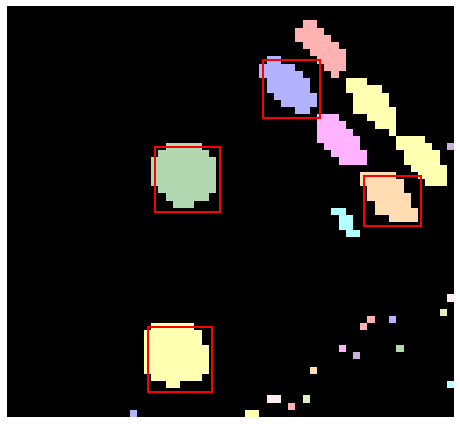

total points: 17


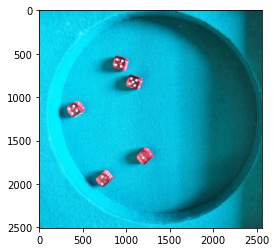

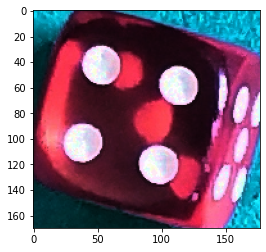

area: 705 dims: 30 30 ratio: 0.9724137931034482 center: (42.50212765957447, 52.87234042553192)
area: 709 dims: 30 29 ratio: 0.9725651577503429 center: (58.528913963328634, 113.19605077574047)
area: 711 dims: 30 30 ratio: 0.9634146341463414 center: (103.16455696202532, 38.319268635724335)
area: 717 dims: 30 30 ratio: 0.9755102040816327 center: (120.10181311018131, 97.57461645746164)
points: 4


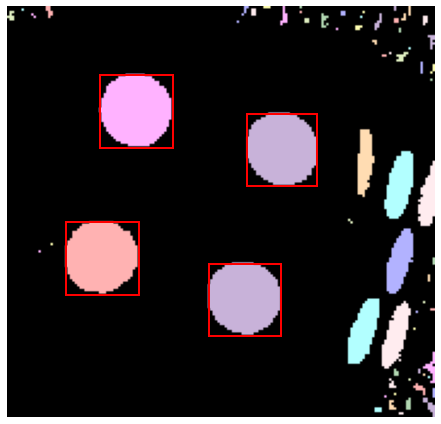

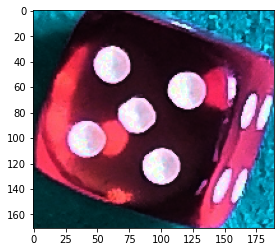

area: 637 dims: 29 28 ratio: 0.9740061162079511 center: (42.44113029827316, 61.56671899529042)
area: 679 dims: 29 29 ratio: 0.9741750358680057 center: (62.64653902798233, 120.24889543446244)
area: 617 dims: 28 29 ratio: 0.9747235387045814 center: (82.07941653160454, 81.06969205834685)
area: 648 dims: 28 29 ratio: 0.972972972972973 center: (100.80246913580247, 41.623456790123456)
area: 650 dims: 29 29 ratio: 0.9687034277198212 center: (122.08, 100.14923076923077)
points: 5


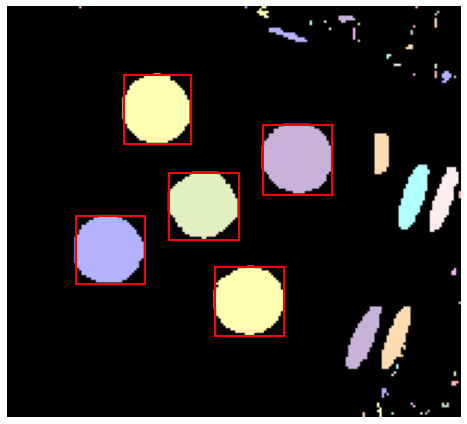

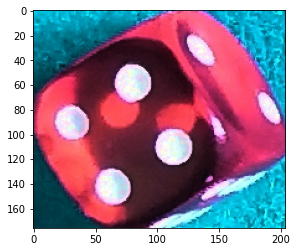

area: 686 dims: 30 29 ratio: 0.9758179231863442 center: (58.29737609329446, 80.100583090379)
area: 569 dims: 28 27 ratio: 0.9530988274706867 center: (90.48154657293497, 31.115992970123024)
area: 676 dims: 29 29 ratio: 0.9726618705035971 center: (110.14201183431953, 113.05917159763314)
area: 625 dims: 29 28 ratio: 0.9615384615384616 center: (142.1104, 63.9808)
points: 4


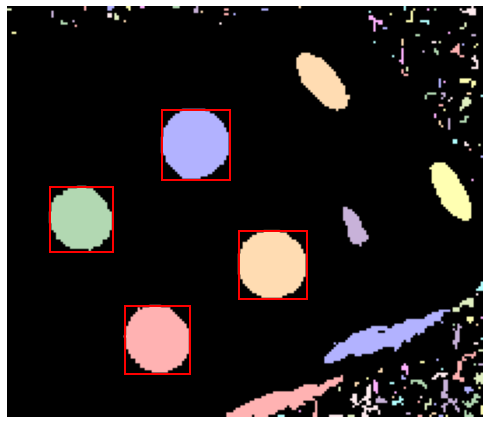

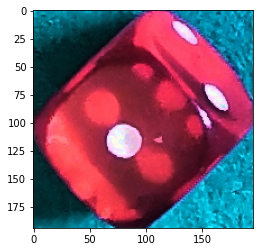

area: 711 dims: 30 31 ratio: 0.9647218453188603 center: (116.09423347398031, 80.55274261603375)
points: 1


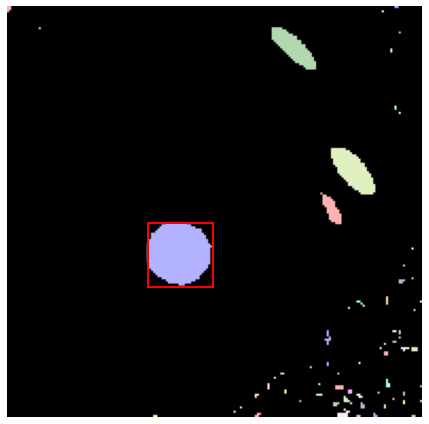

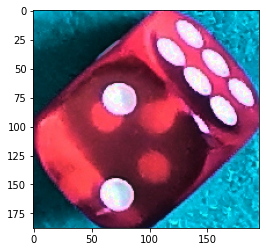

area: 368 dims: 24 24 ratio: 0.9583333333333334 center: (60.432065217391305, 141.64402173913044)
area: 635 dims: 27 29 ratio: 0.9754224270353302 center: (76.22992125984251, 74.21732283464567)
area: 633 dims: 28 29 ratio: 0.9738461538461538 center: (158.56556082148498, 72.01579778830964)
points: 3


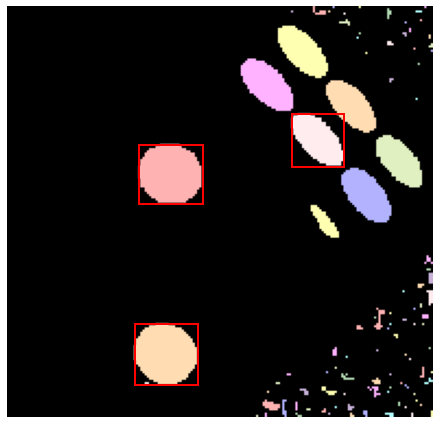

total points: 17


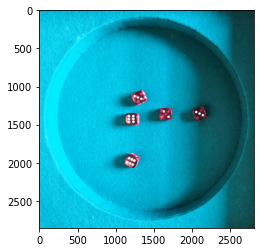

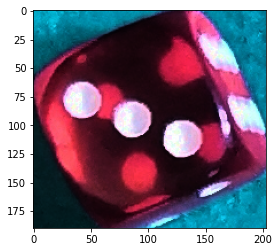

area: 663 dims: 34 35 ratio: 0.9259776536312849 center: (37.672699849170435, 161.5550527903469)
area: 789 dims: 31 32 ratio: 0.9704797047970479 center: (78.08745247148289, 42.48922686945501)
area: 674 dims: 35 32 ratio: 0.9258241758241759 center: (90.58753709198812, 185.30712166172106)
area: 785 dims: 31 31 ratio: 0.9775840597758406 center: (94.89171974522293, 86.02420382165604)
area: 825 dims: 31 32 ratio: 0.9809750297265161 center: (111.82060606060607, 129.45090909090908)
points: 5


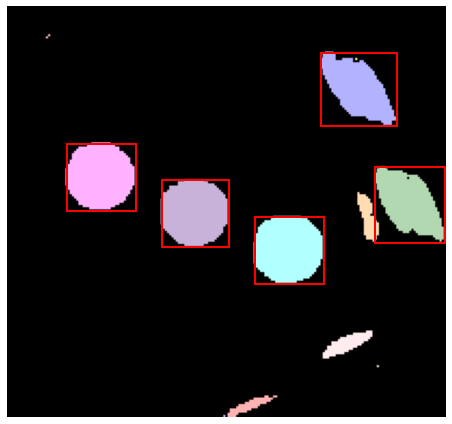

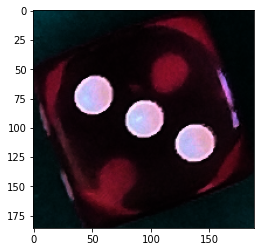

area: 820 dims: 33 31 ratio: 0.9704142011834319 center: (72.42682926829268, 51.27317073170732)
area: 773 dims: 31 31 ratio: 0.968671679197995 center: (92.53686934023285, 94.80336351875809)
area: 809 dims: 31 33 ratio: 0.9711884753901561 center: (113.05067985166873, 137.90234857849197)
points: 3


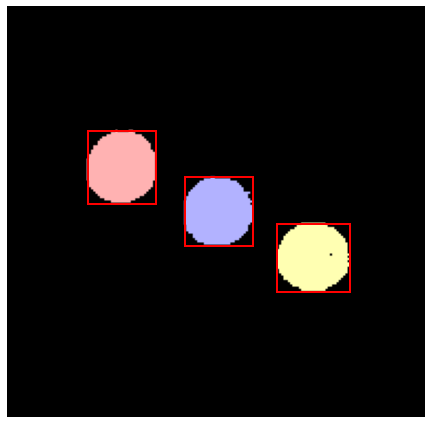

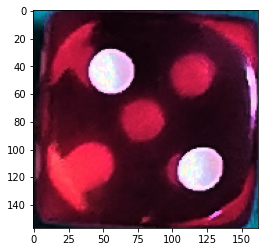

area: 816 dims: 32 32 ratio: 0.9784172661870504 center: (43.747549019607845, 55.75735294117647)
area: 796 dims: 31 32 ratio: 0.9790897908979089 center: (114.02261306532664, 119.89447236180905)
points: 2


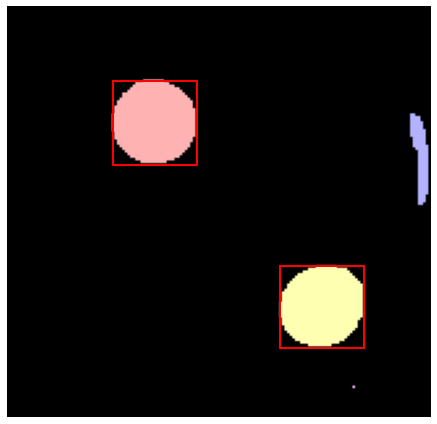

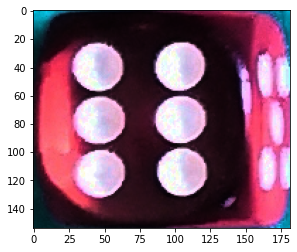

area: 921 dims: 34 35 ratio: 0.9643979057591623 center: (39.9413680781759, 45.42671009771987)
area: 914 dims: 34 34 ratio: 0.9764957264957265 center: (39.39824945295405, 103.68490153172867)
area: 909 dims: 33 36 ratio: 0.9670212765957447 center: (77.38063806380639, 46.45984598459846)
area: 916 dims: 33 35 ratio: 0.976545842217484 center: (76.8853711790393, 103.9967248908297)
area: 897 dims: 33 34 ratio: 0.9707792207792207 center: (113.9866220735786, 104.98885172798217)
area: 890 dims: 33 34 ratio: 0.9694989106753813 center: (115.08314606741573, 46.99438202247191)
points: 6


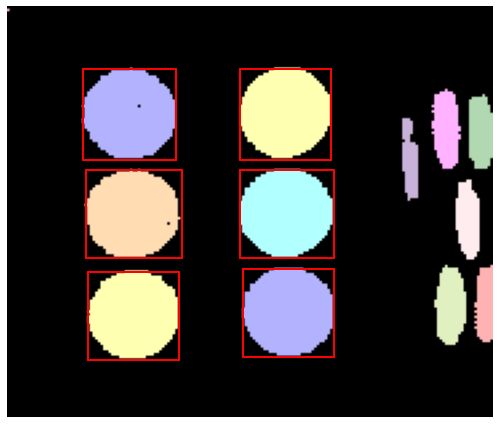

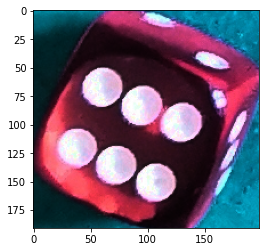

area: 901 dims: 34 34 ratio: 0.9719525350593312 center: (67.24639289678136, 60.3684794672586)
area: 933 dims: 34 35 ratio: 0.9749216300940439 center: (83.37299035369774, 94.73954983922829)
area: 922 dims: 33 35 ratio: 0.9808510638297873 center: (98.16919739696313, 129.44034707158352)
area: 895 dims: 34 34 ratio: 0.9665226781857451 center: (120.12402234636872, 37.79217877094972)
area: 906 dims: 34 35 ratio: 0.9628055260361318 center: (135.36754966887418, 72.30573951434879)
area: 868 dims: 32 33 ratio: 0.9752808988764045 center: (150.67165898617512, 106.97235023041475)
points: 6


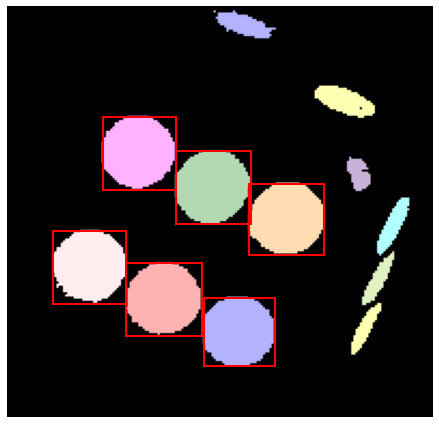

total points: 22


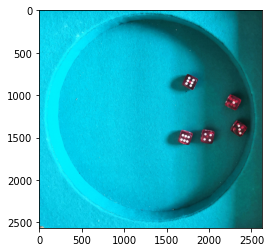

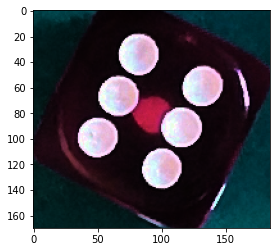

area: 780 dims: 32 31 ratio: 0.968944099378882 center: (34.28333333333333, 81.9551282051282)
area: 764 dims: 31 31 ratio: 0.9807445442875481 center: (59.09947643979058, 131.815445026178)
area: 755 dims: 30 31 ratio: 0.9741935483870968 center: (66.5205298013245, 66.18543046357615)
area: 769 dims: 31 32 ratio: 0.9746514575411914 center: (91.074122236671, 115.55396618985695)
area: 748 dims: 31 31 ratio: 0.9739583333333334 center: (98.8716577540107, 50.01604278074866)
area: 747 dims: 31 31 ratio: 0.9713914174252276 center: (123.05622489959839, 100.06024096385542)
points: 6


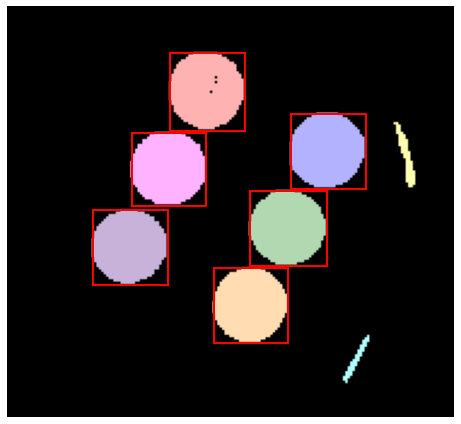

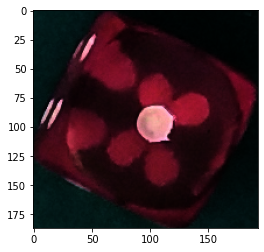

points: 0


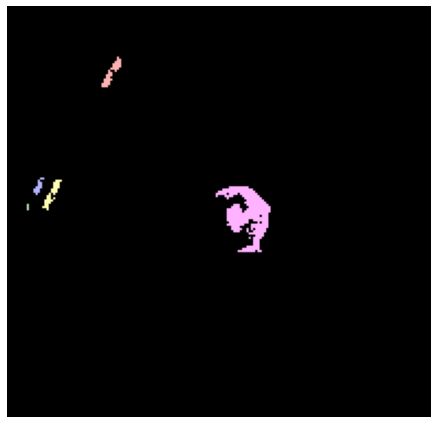

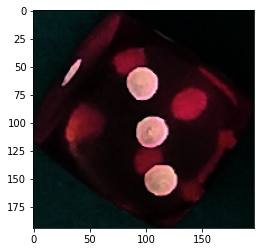

points: 0


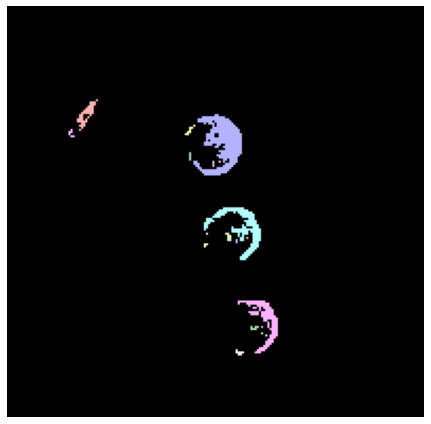

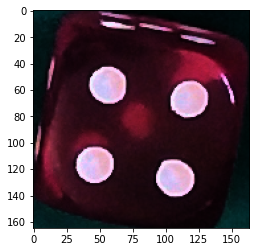

area: 609 dims: 28 27 ratio: 0.9712918660287081 center: (56.28899835796388, 56.24630541871921)
area: 607 dims: 27 28 ratio: 0.9727564102564102 center: (67.00823723228996, 117.61120263591434)
area: 610 dims: 27 28 ratio: 0.9775641025641025 center: (116.68688524590164, 46.385245901639344)
area: 625 dims: 27 29 ratio: 0.9704968944099379 center: (126.888, 106.9728)
points: 4


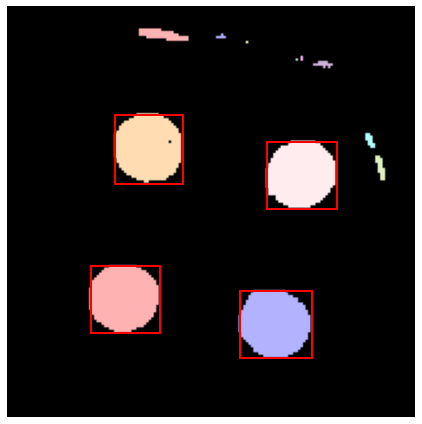

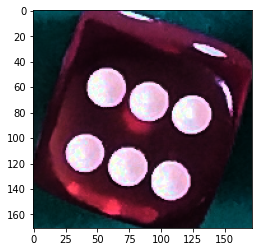

area: 735 dims: 30 30 ratio: 0.9748010610079576 center: (60.47074829931973, 57.27074829931973)
area: 738 dims: 30 30 ratio: 0.9813829787234043 center: (71.44850948509485, 90.53658536585365)
area: 737 dims: 30 31 ratio: 0.9697368421052631 center: (81.6607869742198, 124.09905020352781)
area: 698 dims: 29 30 ratio: 0.9817158931082982 center: (111.78796561604585, 40.38538681948424)
area: 733 dims: 30 31 ratio: 0.9695767195767195 center: (122.49658935879945, 74.0)
area: 728 dims: 30 30 ratio: 0.9771812080536912 center: (133.44642857142858, 107.47115384615384)
points: 6


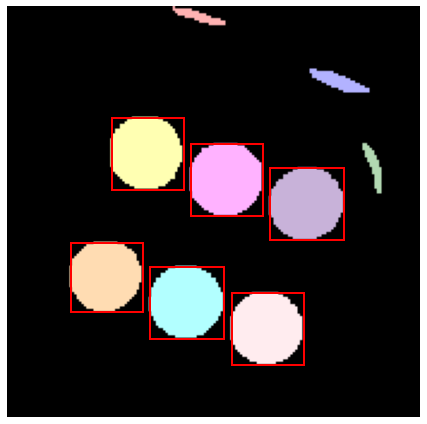

total points: 16


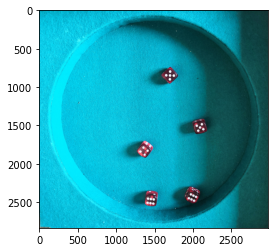

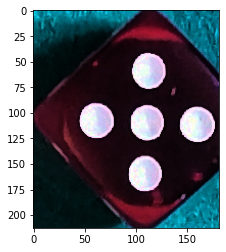

area: 878 dims: 35 32 ratio: 0.9701657458563536 center: (59.023917995444194, 112.81435079726651)
area: 884 dims: 34 33 ratio: 0.9746416758544653 center: (107.67533936651584, 61.702488687782804)
area: 870 dims: 34 32 ratio: 0.9753363228699552 center: (109.67701149425288, 111.30229885057472)
area: 905 dims: 34 34 ratio: 0.9741657696447793 center: (111.52707182320442, 160.32707182320442)
area: 866 dims: 34 32 ratio: 0.981859410430839 center: (159.5554272517321, 109.2309468822171)
points: 5


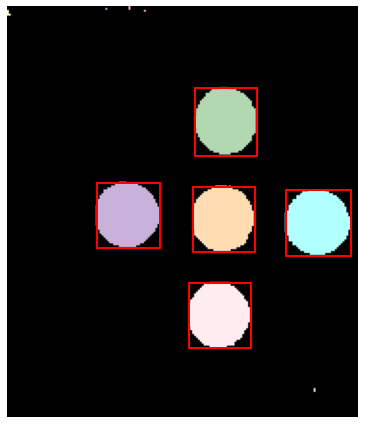

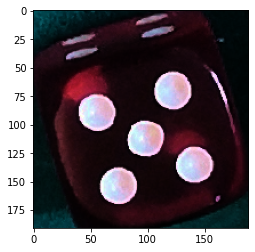

area: 818 dims: 33 31 ratio: 0.964622641509434 center: (70.12836185819071, 121.8679706601467)
area: 802 dims: 32 32 ratio: 0.9685990338164251 center: (89.46259351620948, 55.38778054862843)
area: 775 dims: 31 31 ratio: 0.9567901234567902 center: (112.12258064516129, 97.85677419354839)
area: 783 dims: 31 32 ratio: 0.97875 center: (135.13920817369095, 140.74201787994892)
area: 798 dims: 32 32 ratio: 0.9649334945586457 center: (153.5952380952381, 74.29323308270676)
points: 5


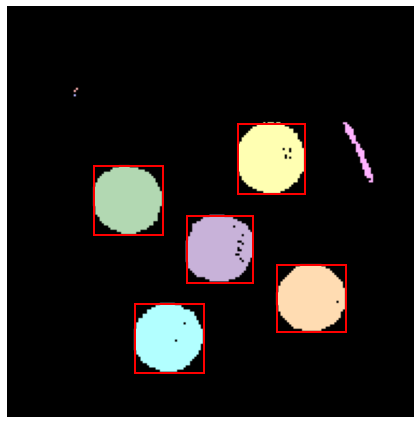

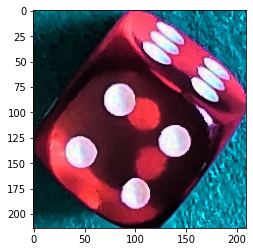

area: 754 dims: 31 30 ratio: 0.9766839378238342 center: (87.8209549071618, 84.63793103448276)
area: 752 dims: 31 30 ratio: 0.9766233766233766 center: (128.19813829787233, 138.58111702127658)
area: 738 dims: 31 31 ratio: 0.9659685863874345 center: (139.03658536585365, 46.449864498644985)
area: 645 dims: 30 28 ratio: 0.9612518628912071 center: (179.67596899224807, 100.28062015503876)
points: 4


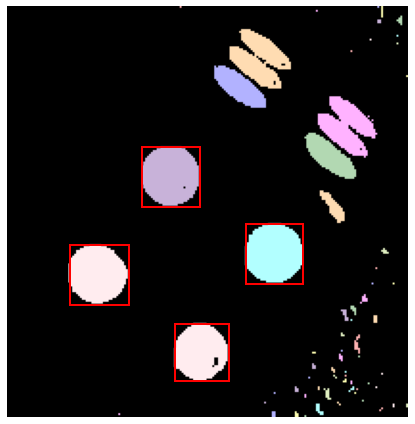

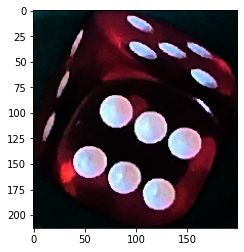

area: 783 dims: 32 32 ratio: 0.9572127139364304 center: (98.40229885057471, 80.63218390804597)
area: 783 dims: 30 32 ratio: 0.9738805970149254 center: (114.4074074074074, 114.30268199233717)
area: 739 dims: 30 32 ratio: 0.9438058748403576 center: (129.74018944519622, 147.3640054127199)
area: 759 dims: 31 33 ratio: 0.9312883435582822 center: (148.1725955204216, 54.78656126482213)
area: 718 dims: 31 32 ratio: 0.8986232790988736 center: (163.7284122562674, 88.04038997214485)
area: 752 dims: 30 31 ratio: 0.9678249678249679 center: (179.4255319148936, 122.06781914893617)
points: 6


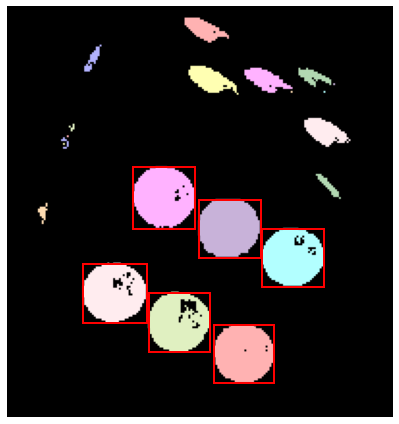

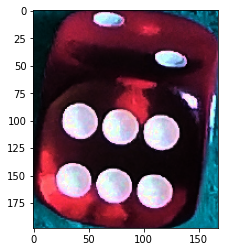

area: 810 dims: 32 32 ratio: 0.9723889555822329 center: (100.37901234567902, 42.05679012345679)
area: 816 dims: 31 33 ratio: 0.9772455089820359 center: (105.8406862745098, 78.81372549019608)
area: 805 dims: 31 32 ratio: 0.9757575757575757 center: (110.84099378881987, 116.12422360248448)
area: 769 dims: 31 32 ratio: 0.9648682559598495 center: (153.96749024707412, 36.78023407022106)
area: 795 dims: 31 33 ratio: 0.9671532846715328 center: (159.11698113207547, 73.14339622641509)
area: 761 dims: 30 31 ratio: 0.9706632653061225 center: (164.161629434954, 109.71222076215506)
points: 6


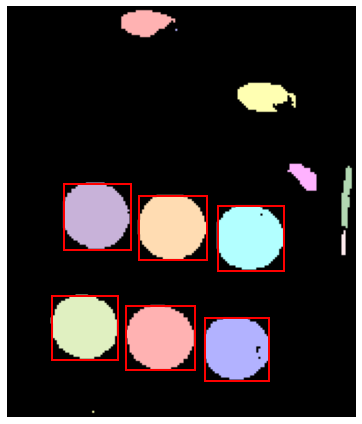

total points: 26


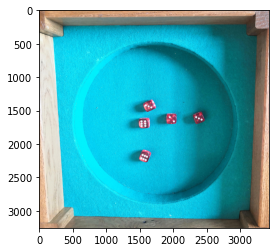

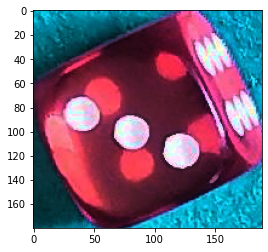

area: 622 dims: 28 29 ratio: 0.9779874213836478 center: (85.57073954983923, 39.950160771704184)
area: 629 dims: 28 29 ratio: 0.9691833590138675 center: (100.45786963434023, 81.02543720190779)
area: 659 dims: 29 30 ratio: 0.9592430858806404 center: (115.8103186646434, 121.80424886191199)
points: 3


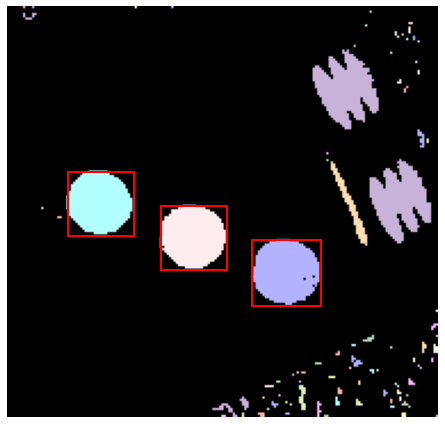

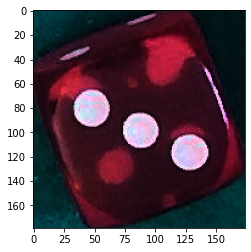

area: 675 dims: 30 29 ratio: 0.9698275862068966 center: (80.19259259259259, 47.57333333333333)
area: 647 dims: 28 29 ratio: 0.9714714714714715 center: (98.35085007727976, 87.80680061823803)
area: 681 dims: 28 30 ratio: 0.9756446991404012 center: (116.50367107195301, 128.13362701908957)
points: 3


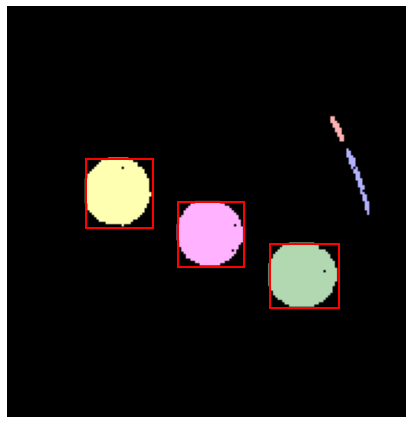

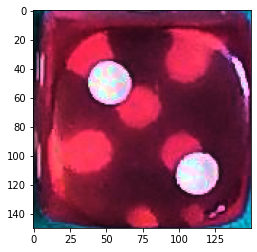

area: 672 dims: 30 29 ratio: 0.9641319942611191 center: (49.617559523809526, 51.986607142857146)
area: 648 dims: 29 28 ratio: 0.972972972972973 center: (112.10648148148148, 112.65123456790124)
points: 2


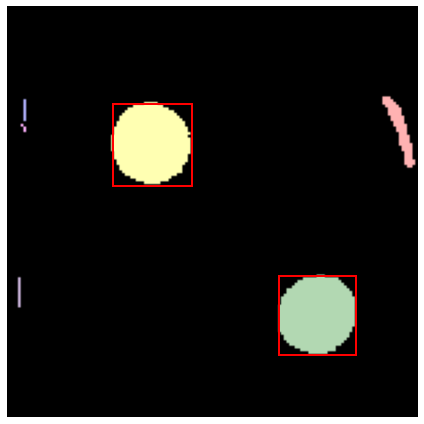

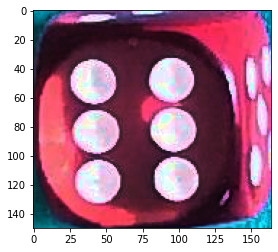

area: 728 dims: 30 31 ratio: 0.9680851063829787 center: (47.60302197802198, 95.07417582417582)
area: 739 dims: 31 31 ratio: 0.9660130718954248 center: (48.926928281461436, 41.16102841677943)
area: 721 dims: 30 31 ratio: 0.9730094466936572 center: (82.03051317614424, 96.23994452149792)
area: 732 dims: 30 31 ratio: 0.9656992084432717 center: (83.24726775956285, 42.994535519125684)
area: 717 dims: 30 30 ratio: 0.9728629579375848 center: (115.7391910739191, 98.18549511854951)
area: 710 dims: 30 31 ratio: 0.9633649932157394 center: (117.50985915492957, 44.319718309859155)
points: 6


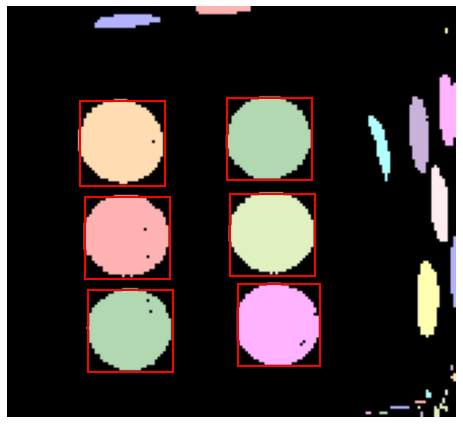

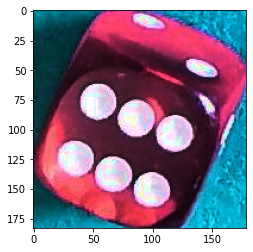

area: 712 dims: 30 30 ratio: 0.964769647696477 center: (76.4255617977528, 54.4002808988764)
area: 731 dims: 30 31 ratio: 0.9682119205298013 center: (90.51162790697674, 86.3734610123119)
area: 729 dims: 31 30 ratio: 0.9772117962466488 center: (103.10973936899863, 118.49382716049382)
area: 701 dims: 30 30 ratio: 0.9615912208504801 center: (124.02853067047076, 35.29101283880171)
area: 710 dims: 30 31 ratio: 0.9699453551912568 center: (137.31267605633803, 67.20845070422536)
area: 684 dims: 29 30 ratio: 0.972972972972973 center: (150.3216374269006, 99.33479532163743)
points: 6


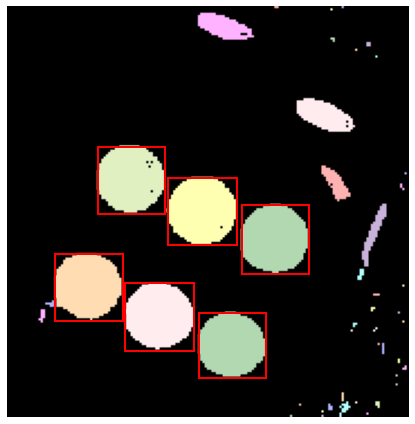

total points: 20


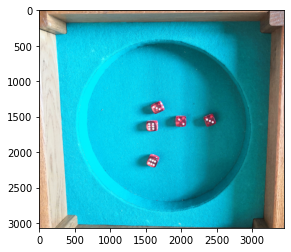

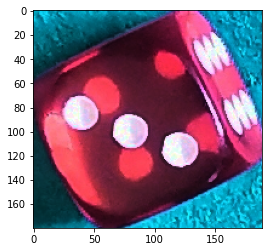

area: 628 dims: 28 29 ratio: 0.9721362229102167 center: (84.5, 38.97133757961783)
area: 636 dims: 28 29 ratio: 0.9754601226993865 center: (99.45754716981132, 80.00628930817611)
area: 666 dims: 29 30 ratio: 0.9624277456647399 center: (114.7957957957958, 120.85135135135135)
points: 3


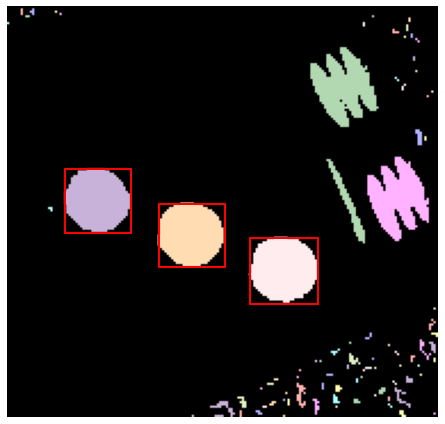

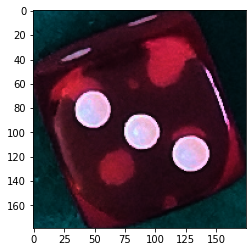

area: 674 dims: 29 28 ratio: 0.983941605839416 center: (81.1320474777448, 48.54154302670623)
area: 652 dims: 28 29 ratio: 0.9760479041916168 center: (99.36963190184049, 88.88036809815951)
area: 684 dims: 28 30 ratio: 0.9785407725321889 center: (117.46491228070175, 129.17397660818713)
points: 3


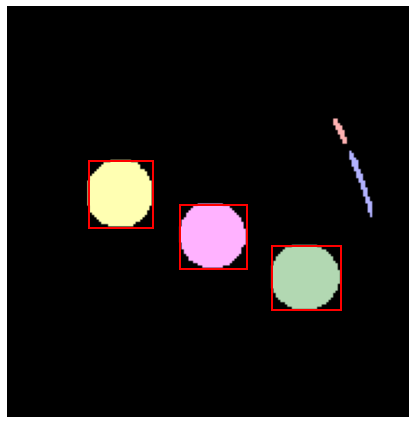

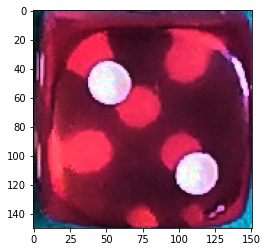

area: 680 dims: 30 29 ratio: 0.9686609686609686 center: (49.694117647058825, 52.11029411764706)
area: 652 dims: 29 28 ratio: 0.9731343283582089 center: (112.15184049079754, 112.58588957055214)
points: 2


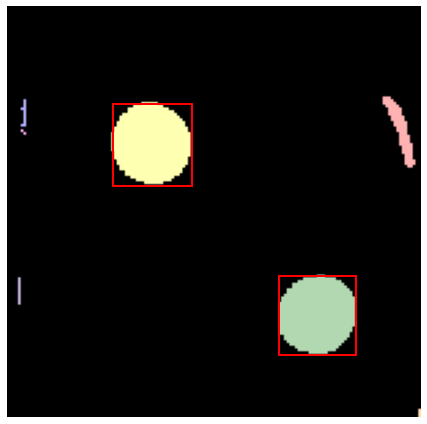

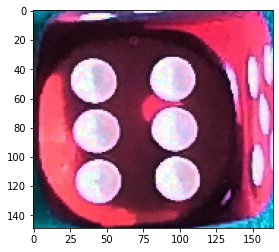

area: 731 dims: 30 31 ratio: 0.9707835325365206 center: (46.6155950752394, 95.03556771545827)
area: 744 dims: 31 31 ratio: 0.9662337662337662 center: (47.961021505376344, 41.11827956989247)
area: 725 dims: 31 31 ratio: 0.9679572763684913 center: (80.95586206896552, 96.22344827586207)
area: 739 dims: 30 31 ratio: 0.9723684210526315 center: (82.30311231393776, 43.020297699594046)
area: 721 dims: 30 30 ratio: 0.9782903663500678 center: (114.77115117891817, 98.24133148404994)
area: 720 dims: 30 31 ratio: 0.9703504043126685 center: (116.51666666666667, 44.268055555555556)
points: 6


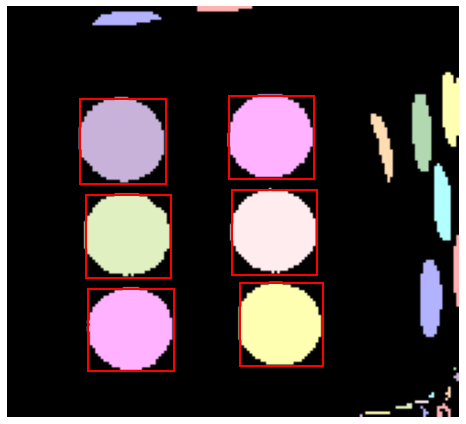

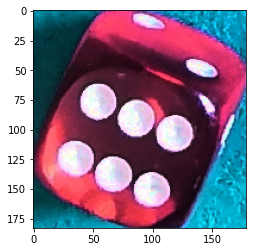

area: 719 dims: 30 30 ratio: 0.9716216216216216 center: (76.39916550764951, 54.43115438108484)
area: 736 dims: 30 31 ratio: 0.9722589167767504 center: (90.50135869565217, 86.4116847826087)
area: 729 dims: 31 30 ratio: 0.9772117962466488 center: (103.09190672153635, 118.53772290809327)
area: 712 dims: 29 33 ratio: 0.9368421052631579 center: (124.07303370786516, 35.14747191011236)
area: 714 dims: 30 31 ratio: 0.970108695652174 center: (137.3109243697479, 67.1890756302521)
area: 687 dims: 29 30 ratio: 0.9744680851063829 center: (150.36535662299855, 99.36826783114992)
points: 6


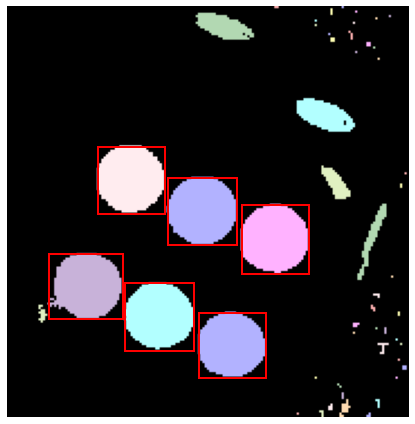

total points: 20


In [33]:
for img, (i, die) in zip(imgs, enumerate(dice)):
  plt.imshow(img)
  plt.show()

  total_points = 0
  for j, region in enumerate(die):
    minr, minc, maxr, maxc = region
    die_w, die_h = maxr - minr, maxc - minc
    img_die = img[minr:maxr, minc:maxc]
    img_die = saturation_reduction(img_die, 2) # 'removes' transparency of dice
    img_die = gamma_transformation(img_die, 2)

    plt.imshow(img_die)
    plt.show()
    

    #sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    #sharpen = cv2.filter2D(rgb2gray(img_die), -1, sharpen_kereditnel)
    #sharpen = sharpen[int(0.1 * die_w):, :int(die_h * 0.97)]
    #die_w, die_h = sharpen.shape
    img_die = color.rgb2gray(img_die)
    # flat_image = img_die.flatten()
    # cdf,bins = skimage.exposure.cumulative_distribution(flat_image)
    # flat_new_image = np.interp(flat_image, xp=bins, fp=256*cdf)
    # img_die = np.reshape(flat_new_image, img_die.shape)
    # plt.imshow(img_die, cmap='gray')
    # plt.show()
    bin_img = img_die >= 0.68

    label_img = label(bin_img)
    image_label_overlay = label2rgb(label=label_img, image=bin_img, bg_label=0)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image_label_overlay)

    count = 0
    regions = regionprops(label_img)
    for region in regions:
      # take regions with large enough areas
      minr, minc, maxr, maxc = region.bbox
      w, h = maxr - minr, maxc - minc
      if region.area >= 0.01 * (die_w * die_h) and region.solidity > 0.85 and w / h > 0.8 and w / h < 1.2:
          # draw rectangle around segmented circles
          print('area:', region.area, 'dims:', w, h, 'ratio:', region.solidity, 'center:', region.centroid)
          rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
          ax.add_patch(rect)
          count += 1
        
    ax.set_axis_off()
    plt.tight_layout()

    print('points:', count)
    total_points += count
    plt.show()
  print('total points:', total_points)